In [1]:

import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

CSV_PATH="cleaned_songs.csv"
df=pd.read_csv(CSV_PATH)
random_seed=47

2025-10-18 14:43:48.561721: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-18 14:43:49.048873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/ivan/Deskto

Parameters to test
Best F1 Score: 0.6983445428792973
Best hyperparameters: {'max_features': 2000, 'n_layers': 1, 'neurons': 228, 'activation': 'tanh', 'dropout_rate': 0.11084515268749309, 'optimizer': 'adam', 'lr': 0.00503887829334363, 'l2_reg': 0.00010248432412205469, 'n_epochs': 14}


Num GPUs Available:  1
Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1993 - loss: 3.1891
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4295 - loss: 2.3914
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7940 - loss: 1.4726
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9491 - loss: 0.8220
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9817 - loss: 0.5700
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9942 - loss: 0.4472
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9992 - loss: 0.3700
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9992 - loss: 0.3166
Epoch 9/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9992 - loss: 0.2789
Epoch 10/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9992 - loss: 0.2502
Epoch 11/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2278
Epoch 12/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0

2025-10-18 14:55:41.913123: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


F1 score on evaluation dataset: 0.04146416427295019
Confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


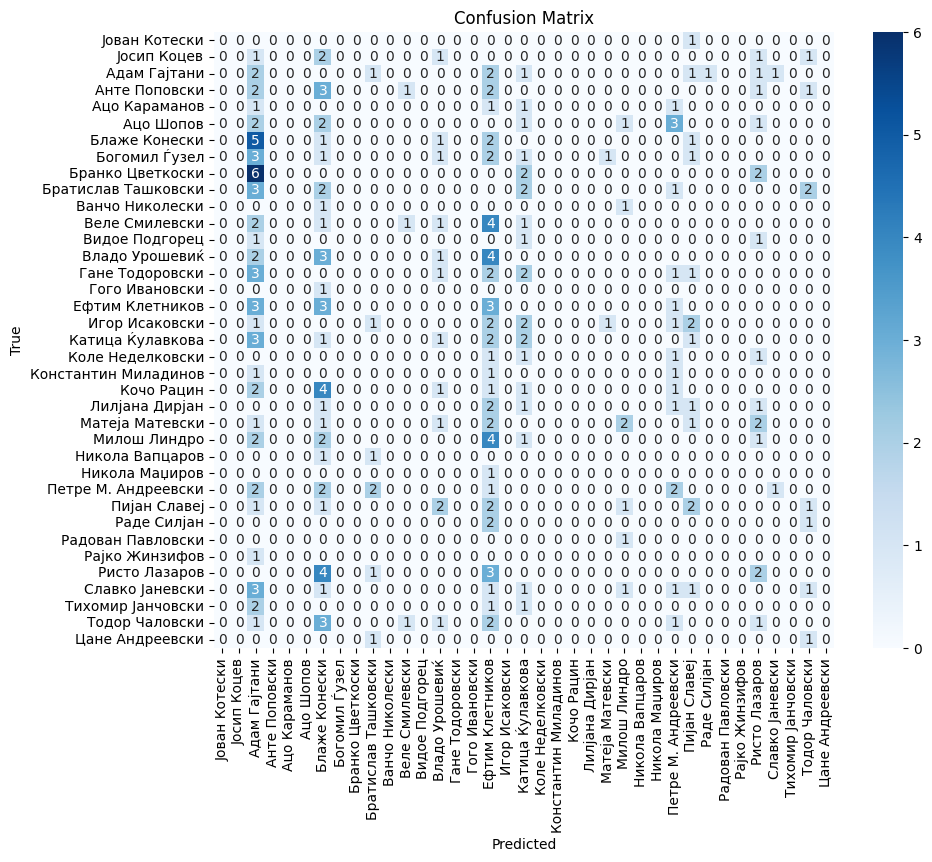

In [12]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')  # Explicitly disable GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Best hyperparameters
best_params = {
    'max_features': 2000,
    'n_layers': 1,
    'neurons': 228,
    'activation': 'tanh',
    'dropout_rate': 0.11084515268749309,
    'optimizer': 'adam',
    'lr': 0.00503887829334363,
    'l2_reg': 0.00010248432412205469,
    'n_epochs': 14
}

# Load training dataset
TRAIN_CSV = "cleaned_songs.csv"
df_train = pd.read_csv(TRAIN_CSV)
df_train['song_text'] = df_train['song_text'].str.lower()
vectorizer = TfidfVectorizer(
    max_features=best_params['max_features'], ngram_range=(1,2), min_df=2, max_df=0.8
)
X_train = vectorizer.fit_transform(df_train['song_text']).toarray()
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train['author'])
num_classes = len(label_encoder.classes_)
X_train = np.expand_dims(X_train, axis=1)

# Build model
model = keras.Sequential()
model.add(layers.Input(shape=(1, X_train.shape[2])))
for i in range(best_params['n_layers']):
    return_sequences = i < best_params['n_layers'] - 1
    model.add(layers.LSTM(
        best_params['neurons'],
        activation=best_params['activation'],
        kernel_regularizer=regularizers.l2(best_params['l2_reg']),
        return_sequences=return_sequences
    ))
model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.Dense(num_classes, activation="softmax"))
optimizer = keras.optimizers.Adam(learning_rate=best_params['lr'])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train model
model.fit(X_train, y_train, epochs=best_params['n_epochs'], batch_size=32, verbose=1)

# Load evaluation dataset
EVAL_CSV = "../author_songs_created_only_with_styles.csv"
df_eval = pd.read_csv(EVAL_CSV)
df_eval['new_song'] = df_eval['new_song'].str.lower()
X_eval = vectorizer.transform(df_eval['new_song']).toarray()
X_eval = np.expand_dims(X_eval, axis=1)
mask = df_eval['author'].isin(label_encoder.classes_)
X_eval = X_eval[mask.values]
y_eval = df_eval['author'][mask].values
y_eval_encoded = label_encoder.transform(y_eval)

# Evaluate
y_pred = np.argmax(model.predict(X_eval, verbose=0), axis=1)
f1 = f1_score(y_eval_encoded, y_pred, average="weighted")
print("F1 score on evaluation dataset:", f1)
cm = confusion_matrix(y_eval_encoded, y_pred)
print("Confusion matrix:\n", cm)

# Plot confusion matrix as a seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Best F1 Score: 0.7197795050397985
Best hyperparameters: {'max_features': 4619, 'n_layers': 1, 'neurons': 567, 'activation': 'tanh', 'dropout_rate': 0.3406819279083615, 'optimizer': 'rmsprop', 'lr': 0.0007878787378953067, 'l2_reg': 3.145848564707723e-05, 'n_epochs': 41, 'min_df': 3, 'max_df': 0.8904674508605334, 'ngram_range': '1-1'}
FFW

/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/resource_handle.proto. P

Num GPUs Available:  0


2025-10-18 15:55:15.680527: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


Epoch 1/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1501 - loss: 3.3352
Epoch 2/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2427 - loss: 2.7980
Epoch 3/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3645 - loss: 2.5030
Epoch 4/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4804 - loss: 2.2006
Epoch 5/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6097 - loss: 1.8806
Epoch 6/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7556 - loss: 1.5563
Epoch 7/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8399 - loss: 1.2531
Epoch 8/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8891 - loss: 0.9834
Epoch 9/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9249 - loss: 0.7624
Epoch 10/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9508 - loss: 0.5797
Epoch 11/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9600 - loss: 0.4454
Epoch 12/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - l

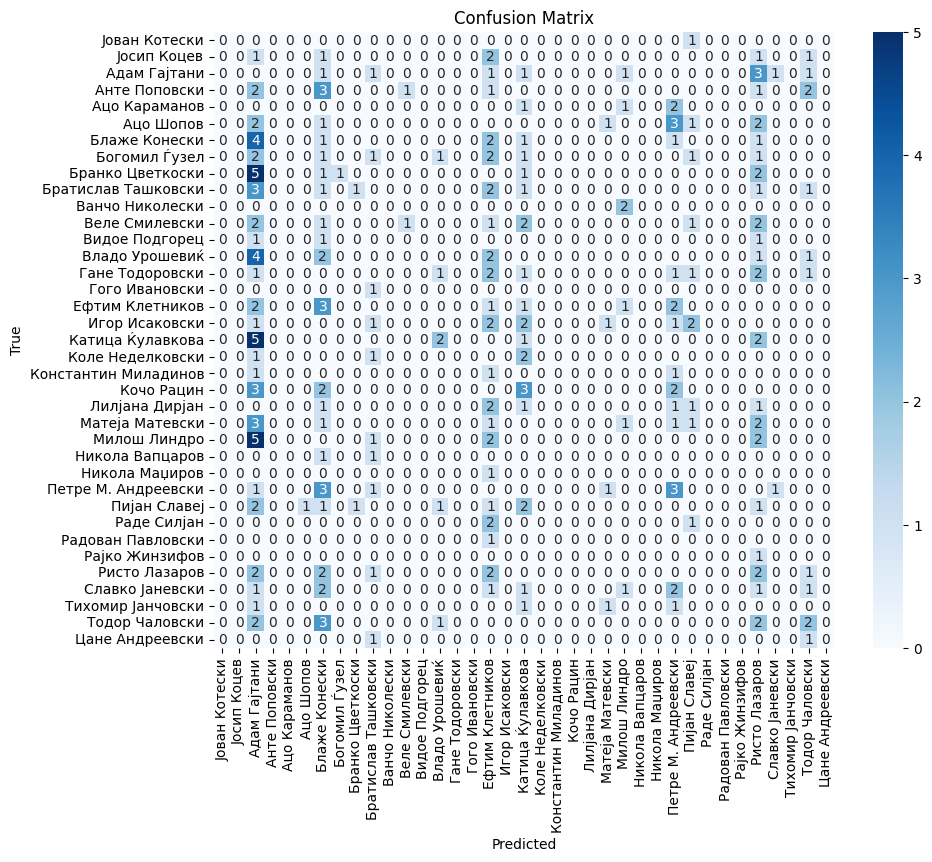

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')  # Explicitly disable GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Best hyperparameters
best_params = {
    'max_features': 4619,
    'n_layers': 1,
    'neurons': 567,
    'activation': 'tanh',
    'dropout_rate': 0.3406819279083615,
    'optimizer': 'rmsprop',
    'lr': 0.0007878787378953067,
    'l2_reg': 3.145848564707723e-05,
    'n_epochs': 41,
    'min_df': 3,
    'max_df': 0.8904674508605334,
    'ngram_range': (1, 1)
}

# Load training dataset
TRAIN_CSV = "cleaned_songs.csv"
df_train = pd.read_csv(TRAIN_CSV)
df_train['song_text'] = df_train['song_text'].str.lower()

# Vectorize text
vectorizer = TfidfVectorizer(
    max_features=best_params['max_features'],
    ngram_range=best_params['ngram_range'],
    min_df=best_params['min_df'],
    max_df=best_params['max_df']
)
X_train = vectorizer.fit_transform(df_train['song_text']).toarray()

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train['author'])
num_classes = len(label_encoder.classes_)

# Build feedforward neural network model
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
for i in range(best_params['n_layers']):
    model.add(layers.Dense(
        best_params['neurons'],
        activation=best_params['activation'],
        kernel_regularizer=regularizers.l2(best_params['l2_reg'])
    ))
    model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.Dense(num_classes, activation="softmax"))

# Compile model
optimizer = keras.optimizers.RMSprop(learning_rate=best_params['lr'])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train model
model.fit(X_train, y_train, epochs=best_params['n_epochs'], batch_size=32, verbose=1)

# Load evaluation dataset
EVAL_CSV = "../author_songs_created_only_with_styles.csv"
df_eval = pd.read_csv(EVAL_CSV)
df_eval['new_song'] = df_eval['new_song'].str.lower()
X_eval = vectorizer.transform(df_eval['new_song']).toarray()
mask = df_eval['author'].isin(label_encoder.classes_)
X_eval = X_eval[mask.values]
y_eval = df_eval['author'][mask].values
y_eval_encoded = label_encoder.transform(y_eval)

# Evaluate
y_pred = np.argmax(model.predict(X_eval, verbose=0), axis=1)
f1 = f1_score(y_eval_encoded, y_pred, average="weighted")
print("F1 score on evaluation dataset:", f1)
cm = confusion_matrix(y_eval_encoded, y_pred)
print("Confusion matrix:\n", cm)

# Plot confusion matrix as a seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()